# A
## y = mx + b

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.array(pd.read_csv("Data/length_weight.csv")).transpose()
x_data = np.expand_dims(data[0],1)
y_data = np.expand_dims(data[1],1)

y = mx + b

In [3]:
m = tf.Variable(0.0, dtype=tf.float64)
b = tf.Variable(0.0, dtype=tf.float64)

In [4]:
batch_size = 10
x = tf.placeholder(tf.float64)
y_true = tf.placeholder(tf.float64)

In [5]:
y_predicted = tf.add(tf.multiply(m,x),b)

In [6]:
loss = tf.losses.mean_squared_error(labels=y_true , predictions=y_predicted)

W0820 23:26:26.202148 4432602560 deprecation.py:323] From /anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

init = tf.global_variables_initializer();

saver = tf.train.Saver()

In [8]:
with tf.Session() as sess:
    sess.run(init)
    
    iterater = 1
    saver.restore(sess,'models/length_weight.ckpt')
    
    for i in range(iterater):
        rand_ind = np.random.randint(0,len(x_data))
        
        feed = {x: x_data[rand_ind], y_true: y_data[rand_ind]}
        
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b, loss_value = sess.run([m, b, loss], {x: x_data, y_true: y_data})
    #model_m, model_b = sess.run([m, b])
    

    saver.save(sess,'models/length_weight.ckpt') 
    sess.close()

W0820 23:26:26.381922 4432602560 deprecation.py:323] From /anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [9]:
y_hat = model_m * x_data + model_b

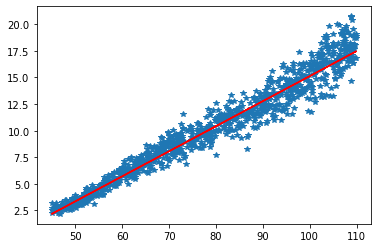

m = 0.23545993329003811, b = -8.416808583795639, loss = 1.0163823


In [10]:
plt.plot(x_data,y_data, '*')
plt.plot(x_data, y_hat, 'r')

plt.show()
print("m = %s, b = %s, loss = %s" % (model_m, model_b, loss_value))